# TAREA 6

* Unidad: Introducción a la probabilidad
* Materia: Matemáticas para Ciencia de Datos
* Programa: Maestría en Ciencia de Datos e Información, INFOTEC
* Docente:  Juliho Castillo Colmenares, Sc.D.

## INSTRUCCIONES

1. Del libro "Ciaburro, G. (2020). Hands-On Simulation Modeling with Python: Develop Simulation Models to Get Accurate Results and Enhance Decision-making Processes. United Kingdom: Packt Publishing.", revisa el capítulo 4 "Exploring Monte Carlo Simulations".
2. Reúnete con los miembros de tu equipo para comentar la lectura y la tarea.
3. Resuelvan el siguiente problema, desarrollando de manera clara todos y cada unos de los puntos.
4. Si incluyes bloque de código, coméntalos de manera concisa, enfatizando su relación con la solución.
5. Detalla la información auxiliar de las gráficas para que tu conclusión sea clara.  
6. Organiza tu documento, escribe de manera explícita el enunciado de cada inciso y sepáralos utilizando secciones.
7. Transcríbanlo a un archivo PDF y suban un único archivo por equipo. 
8. Se considerará un inciso como incorrecto si el resultado no es el esperado, y se considerará incompleto si el resultado no está debidamente justificado.



## PROBLEMA

Vamos a simular el siguiente juego: De una baraja inglesa, se selecciona una mano (5 cartas, sin reemplazo). Si la mano es no es un póquer pierdes $2, pero si la mano es un póquer, la casa te paga un monto acordado.

*Para realizar tus simulaciones utiliza el paquete `Numpy`. De manera particular, si utilizar números (pseudo-aleatorio), fija el generador usando la línea de código `numpy.random.seed(0)`.*

### Inciso A

¿Cuál sería un monto justo para que tu ganancia esperada sea cero? Determina una cantidad justificando tu respuesta.

Sugerencia: [Revisa la lista de manos de póquer que se encuentra en la Wikipedia](https://es.wikipedia.org/wiki/P%C3%B3quer) e investiga como calcular la probabilidad teórica de obtener un full. 

In [18]:
poquers = 624
espacio_muestral = 2_598_960
probabilidad_teorica = poquers/espacio_muestral
probabilidad_teorica

0.00024009603841536616

In [19]:
perdida = 2
ingreso = perdida*(espacio_muestral-poquer)/poquer
print(ingreso)

6246.0


El monto anterior se basa en la probabilidad teórica de obtener un póquer. Pero no siempre amanecemos con buena suerte, y esperar que la suerte nos acompañe. Por eso, haremos una simulación para saber cuanto dinero podríamos esperar perder en una mala racha. 

### Inciso B

Define una función que realice una simulación de 10,000 de manos; y devuelva la frecuencia absoluta con la que aparece un **full** (*full house* en inglés). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

np.random.seed(0)


In [3]:
S =  []

palos = ["Espada", "Copa", "Oro", "Basto"]

numerales = ["A", "K", "Q", "J", 10, 9, 8, 7, 6, 5, 4, 3, 2]

for palo in palos:
    for numeral in numerales:
        S.append((palo, numeral))

S = np.array(S)

In [4]:
def simulacion(total = 10_000):
    N = 0
    for _ in range(total):
        mano_indices = np.random.choice(len(S), size= 5, replace=False)
        mano = S[mano_indices]
        mano_valores = [y for x,y in mano]
        resultados = Counter(mano_valores)
        if set([4,1]) == set(resultados.values()):            
            N += 1
    return N 

### Inciso C

Repite la simulación 1000 veces y registra los resultados. COn esta información, crea un histograma que refleje la frecuencia absoluta de cada resultado. 

In [5]:
numero_manos = 100_000
repeticiones = 100

simulaciones = np.array([simulacion(total = numero_manos) for _ in range(repeticiones)])
print(Counter(simulaciones))

Counter({23: 10, 21: 10, 26: 9, 28: 9, 24: 8, 19: 8, 22: 8, 30: 6, 31: 6, 25: 5, 16: 4, 20: 4, 33: 3, 18: 2, 29: 2, 27: 2, 14: 1, 17: 1, 15: 1, 13: 1})


In [6]:
min_s = min(simulaciones)
max_s = max(simulaciones)
print(min_s, max_s)

13 33


In [7]:
mu = simulaciones.mean()
mu

23.87

In [8]:
sigma = simulaciones.std()
sigma 

4.559945175109017

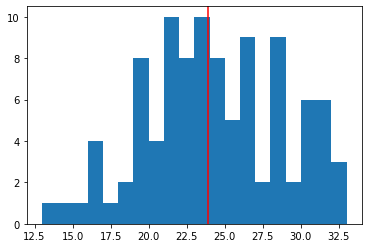

In [9]:

plt.hist(simulaciones, 
    bins=range(min_s, max_s+1))

plt.axvline(mu, color= 'red')

plt.show()

### Inciso D

Con la información anterior, calcula la media y la desviación estándar de las ganancias de todas las simulaciones. Interpreta este resultado usando la [regla empírica.](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

In [20]:
ganancias = ingreso*simulaciones - 1.5*(numero_manos-simulaciones)
mu_g = ganancias.mean()
mu_g 

-872.175

In [21]:
sigma_g = ganancias.std()
sigma_g

28488.25748149358

In [22]:
for k in [1,2,3]:
    print(np.mean(np.abs(ganancias-mu_g)<=k*sigma_g))

0.65
0.95
1.0


### Inciso E

Determina un valor $p$ en el rango de los resultados de tu simulación tal que, aproximadamente, el 5% de los resultados sean menores o iguales que este valor, y calcula la ganancia o perdida esperada para este valor. Interpreta este resultado en términos del [VaR.](https://en.wikipedia.org/wiki/Value_at_risk)

*Nota: Al valor $p$ se le llama 5-percentil*.

In [23]:
p5 = np.percentile(simulaciones, 5)
p5

16.0

In [24]:
print(np.mean(simulaciones <= p5))

0.07


In [25]:
ingreso*p5 - 1.5*(numero_manos-p5)

-50040.0

In [26]:
"""
Aproximación teórica
"""
from scipy.stats import norm
X = norm(mu, sigma)
p5_teorico = X.ppf(0.05)
p5_teorico

16.369557640022066

In [27]:
ingreso*p5_teorico - 1.5*(numero_manos-p5_teorico)

-47731.18864396216